## Анализ исторических данных

In [112]:
import pandas as pd
import numpy as np

# Реальные средние температуры (примерные данные) для городов по сезонам
seasonal_temperatures = {
    "New York": {"winter": 0, "spring": 10, "summer": 25, "autumn": 15},
    "London": {"winter": 5, "spring": 11, "summer": 18, "autumn": 12},
    "Paris": {"winter": 4, "spring": 12, "summer": 20, "autumn": 13},
    "Tokyo": {"winter": 6, "spring": 15, "summer": 27, "autumn": 18},
    "Moscow": {"winter": -10, "spring": 5, "summer": 18, "autumn": 8},
    "Sydney": {"winter": 12, "spring": 18, "summer": 25, "autumn": 20},
    "Berlin": {"winter": 0, "spring": 10, "summer": 20, "autumn": 11},
    "Beijing": {"winter": -2, "spring": 13, "summer": 27, "autumn": 16},
    "Rio de Janeiro": {"winter": 20, "spring": 25, "summer": 30, "autumn": 25},
    "Dubai": {"winter": 20, "spring": 30, "summer": 40, "autumn": 30},
    "Los Angeles": {"winter": 15, "spring": 18, "summer": 25, "autumn": 20},
    "Singapore": {"winter": 27, "spring": 28, "summer": 28, "autumn": 27},
    "Mumbai": {"winter": 25, "spring": 30, "summer": 35, "autumn": 30},
    "Cairo": {"winter": 15, "spring": 25, "summer": 35, "autumn": 25},
    "Mexico City": {"winter": 12, "spring": 18, "summer": 20, "autumn": 15},
}

# Сопоставление месяцев с сезонами
month_to_season = {12: "winter", 1: "winter", 2: "winter",
                   3: "spring", 4: "spring", 5: "spring",
                   6: "summer", 7: "summer", 8: "summer",
                   9: "autumn", 10: "autumn", 11: "autumn"}

# Генерация данных о температуре
def generate_realistic_temperature_data(cities, num_years=10):
    dates = pd.date_range(start="2010-01-01", periods=365 * num_years, freq="D")
    data = []

    for city in cities:
        for date in dates:
            season = month_to_season[date.month]
            mean_temp = seasonal_temperatures[city][season]
            # Добавляем случайное отклонение
            temperature = np.random.normal(loc=mean_temp, scale=5)
            data.append({"city": city, "timestamp": date, "temperature": temperature})

    df = pd.DataFrame(data)
    df['season'] = df['timestamp'].dt.month.map(lambda x: month_to_season[x])
    return df

# Генерация данных
data = generate_realistic_temperature_data(list(seasonal_temperatures.keys()))
data.to_csv('temperature_data.csv', index=False)


In [113]:
import seaborn as sns
import pandas
import matplotlib.pyplot as plt
from datetime import datetime
import nest_asyncio
nest_asyncio.apply() # Для Colab

Положим данные в словарь где ключ это название города

In [114]:
his_temp_data = pd.read_csv('temperature_data.csv')
city_dict = {}
for name, data in his_temp_data.sort_values('timestamp').groupby('city'):
  city_dict[name] = data
display(city_dict['Moscow'])

,city,timestamp,temperature,season
14600,Moscow,2010-01-01,-15.934013,winter
14601,Moscow,2010-01-02,-17.723205,winter
14602,Moscow,2010-01-03,-18.829986,winter
14603,Moscow,2010-01-04,-2.907122,winter
14604,Moscow,2010-01-05,-13.977399,winter
...,...,...,...,...
18245,Moscow,2019-12-25,-7.156541,winter
18246,Moscow,2019-12-26,-3.835406,winter
18247,Moscow,2019-12-27,-3.226352,winter
18248,Moscow,2019-12-28,-10.258492,winter


Построим графики для Москвы за одинаковый период без использования скользящего окна и с ним

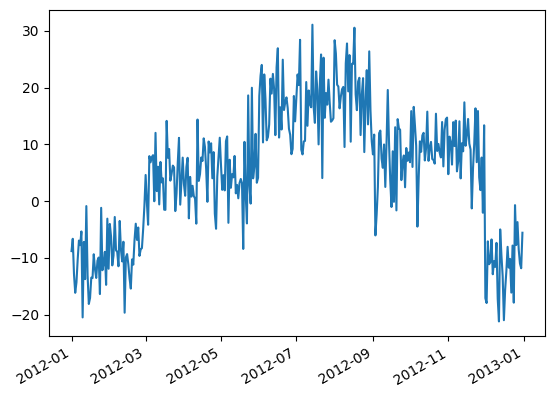

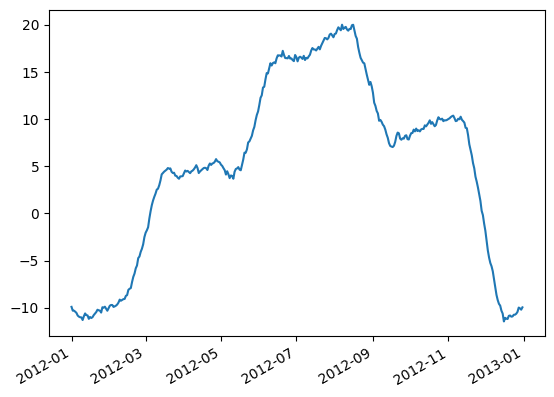

In [115]:
def plot_temperature(data, day=None, length=len(data)):
  if day == None:
    day = data['timestamp'].iloc[0]
  day_idx = data['timestamp'][data['timestamp'] == day].index[0]
  current_data = data.loc[day_idx:(day_idx+length)]
  time = map(lambda x: datetime.strptime(x, '%Y-%m-%d'), current_data['timestamp'])
  plt.plot(list(time), current_data['temperature'])
  plt.gcf().autofmt_xdate()
  plt.show()

def sliding_window(data, size):
  sw = data['temperature'].rolling(window=size, center=True).mean()
  return data.drop(['temperature'], axis=1).join(sw).dropna()

#display(city_dict['Moscow'])
plot_temperature(city_dict['Moscow'], '2012-01-01', 365)

slidind_Moscow = sliding_window(city_dict['Moscow'], 30)
#display(slidind_Moscow)
plot_temperature(slidind_Moscow, '2012-01-01', 365)

Рассчитываем среднюю температуру и стандартное отклонение для каждой пары город - сезон

In [106]:
city_season_stats = his_temp_data.groupby(['city', 'season'])['temperature'].agg(['mean', 'std'])
display(city_season_stats)

mean       std
city           season                     
Beijing        autumn  16.015113  4.866180
               spring  13.083288  4.877566
               summer  26.943082  4.994830
               winter  -2.152814  5.117908
Berlin         autumn  10.974559  5.146246
               spring   9.869406  4.940642
               summer  19.816785  5.010981
               winter   0.323087  4.794685
Cairo          autumn  24.870477  4.942721
               spring  24.711560  5.114303
               summer  34.925990  4.917629
               winter  15.229088  5.022853
Dubai          autumn  29.877295  4.857917
               spring  30.277108  5.177261
               summer  40.060853  5.053727
               winter  20.104694  5.053952
London         autumn  12.222585  5.037080
               spring  11.151212  5.138057
               summer  17.856451  5.070454
               winter   5.114599  4.787115
Los Angeles    autumn  20.120752  5.101814
               spring  18.022305  4.862962
               summer  24.928569  5.106737
               winter  15.139517  5.111523
Mexico City    autumn  15.166688  4.979158
               spring  18.071726  4.811900
               summer  19.917190  5.055588
               winter  12.243604  4.913697
Moscow         autumn   7.936659  5.026564
               spring   4.726106  5.057221
               summer  17.987359  4.975230
               winter  -9.989508  4.937605
Mumbai         autumn  30.110193  5.002135
               spring  30.072187  5.256871
               summer  35.270229  5.024420
               winter  24.772331  4.895536
New York       autumn  15.075184  4.864134
               spring   9.945130  4.946656
               summer  24.968490  5.004798
               winter  -0.052425  5.135122
Paris          autumn  13.021082  4.823921
               spring  12.220820  4.965801
               summer  19.928232  4.958306
               winter   4.094536  5.208132
Rio de Janeiro autumn  24.897819  5.058093
               spring  24.852097  5.069862
               summer  30.146470  4.799831
               winter  19.774745  5.024531
Singapore      autumn  27.015080  4.696455
               spring  27.920793  4.834186
               summer  28.127457  4.948157
               winter  27.338222  4.999588
Sydney         autumn  20.088520  4.970950
               spring  18.093926  4.917527
               summer  24.983331  5.125151
               winter  11.695682  4.943117
Tokyo          autumn  18.289438  4.934881
               spring  15.030833  5.192605
               summer  27.098104  4.893385
               winter   5.996889  4.924719

In [60]:
data_merged = his_temp_data.merge(city_season_stats, on=['city', 'season'])
data_merged

,city,timestamp,temperature,season,mean,std
0,New York,2010-01-01,-7.822501,winter,-0.052425,5.135122
1,New York,2010-01-02,2.423357,winter,-0.052425,5.135122
2,New York,2010-01-03,-4.989617,winter,-0.052425,5.135122
3,New York,2010-01-04,-3.152913,winter,-0.052425,5.135122
4,New York,2010-01-05,1.549555,winter,-0.052425,5.135122
...,...,...,...,...,...,...
54745,Mexico City,2019-12-25,18.238119,winter,12.243604,4.913697
54746,Mexico City,2019-12-26,19.767511,winter,12.243604,4.913697
54747,Mexico City,2019-12-27,14.958221,winter,12.243604,4.913697
54748,Mexico City,2019-12-28,13.404014,winter,12.243604,4.913697


In [61]:
outliers = data_merged[(data_merged['temperature'] - data_merged['mean']).abs() > 2 * data_merged['std']]
outliers

,city,timestamp,temperature,season,mean,std
12,New York,2010-01-13,12.020623,winter,-0.052425,5.135122
46,New York,2010-02-16,14.285851,winter,-0.052425,5.135122
52,New York,2010-02-22,-13.386130,winter,-0.052425,5.135122
57,New York,2010-02-27,10.732088,winter,-0.052425,5.135122
109,New York,2010-04-20,-3.325731,spring,9.945130,4.946656
...,...,...,...,...,...,...
54639,Mexico City,2019-09-10,5.132753,autumn,15.166688,4.979158
54674,Mexico City,2019-10-15,26.649993,autumn,15.166688,4.979158
54680,Mexico City,2019-10-21,4.046134,autumn,15.166688,4.979158
54726,Mexico City,2019-12-06,25.029763,winter,12.243604,4.913697


Проведем замер скорости работы анализа на выбросы:

In [62]:
%%time

city_season_stats = his_temp_data.groupby(['city', 'season'])['temperature'].agg(['mean', 'std'])

data_merged = his_temp_data.merge(city_season_stats, on=['city', 'season'])

outliers = data_merged[(data_merged['temperature'] - data_merged['mean']).abs() > 2 * data_merged['std']]

outliers

CPU times: user 28.9 ms, sys: 1.7 ms, total: 30.6 ms
Wall time: 31.2 ms


,city,timestamp,temperature,season,mean,std
12,New York,2010-01-13,12.020623,winter,-0.052425,5.135122
46,New York,2010-02-16,14.285851,winter,-0.052425,5.135122
52,New York,2010-02-22,-13.386130,winter,-0.052425,5.135122
57,New York,2010-02-27,10.732088,winter,-0.052425,5.135122
109,New York,2010-04-20,-3.325731,spring,9.945130,4.946656
...,...,...,...,...,...,...
54639,Mexico City,2019-09-10,5.132753,autumn,15.166688,4.979158
54674,Mexico City,2019-10-15,26.649993,autumn,15.166688,4.979158
54680,Mexico City,2019-10-21,4.046134,autumn,15.166688,4.979158
54726,Mexico City,2019-12-06,25.029763,winter,12.243604,4.913697


Анализ и так проводится почти моментально (~31.5 ms) за счет быстрых векторных операций Pandas.  
Однако по заданию необходимо распарралелить:

In [63]:
import pandas as pd
import numpy as np
from multiprocessing import Pool, cpu_count

In [71]:
%%time

def process_city_season_group(group):
    res = group.groupby('season')['temperature'].agg(['mean', 'std'])
    res = res.reset_index()
    res['city'] = group['city'].iloc[0]
    return res

def parallel_groupby_stats(data):
    city_groups = [group for _, group in data.groupby('city')]
    with Pool(processes=(cpu_count() - 1)) as pool:
        res = pool.map(process_city_season_group, city_groups)
    return pd.concat(res, ignore_index=True)

city_season_stats = parallel_groupby_stats(his_temp_data)
data_merged = his_temp_data.merge(city_season_stats, on=['city', 'season'])
outliers = data_merged[(data_merged['temperature'] - data_merged['mean']).abs() > 2 * data_merged['std']]
outliers

CPU times: user 49.1 ms, sys: 18.9 ms, total: 68 ms
Wall time: 123 ms


,city,timestamp,temperature,season,mean,std
12,New York,2010-01-13,12.020623,winter,-0.052425,5.135122
46,New York,2010-02-16,14.285851,winter,-0.052425,5.135122
52,New York,2010-02-22,-13.386130,winter,-0.052425,5.135122
57,New York,2010-02-27,10.732088,winter,-0.052425,5.135122
109,New York,2010-04-20,-3.325731,spring,9.945130,4.946656
...,...,...,...,...,...,...
54639,Mexico City,2019-09-10,5.132753,autumn,15.166688,4.979158
54674,Mexico City,2019-10-15,26.649993,autumn,15.166688,4.979158
54680,Mexico City,2019-10-21,4.046134,autumn,15.166688,4.979158
54726,Mexico City,2019-12-06,25.029763,winter,12.243604,4.913697


Время запуска всегда находится в районе 120-150 ms, что примерно в 4-5 раз больше чем обычная версия. Это не удивительно, так как наши данные относительно небольшие и полностью помещаются в оперативную память. В данном случае расходы на создание процессов перевешивают возможное ускорение, однако с более крупными данными такой подход мог бы дать увеличение скорости.

## Мониторинг текущей температуры

In [65]:
import requests

In [66]:
# Украл выше
month_to_season = {12: "winter", 1: "winter", 2: "winter",
                   3: "spring", 4: "spring", 5: "spring",
                   6: "summer", 7: "summer", 8: "summer",
                   9: "autumn", 10: "autumn", 11: "autumn"}

def weather_now(city):
  API_KEY = "api_key"
  url = "http://api.openweathermap.org/data/2.5/weather"
  params = {
      'q': city,
      'appid': API_KEY,
      'units': 'metric',
  }
  response = requests.get(url, params=params)
  if response.status_code != 200:
    return
  else:
    data = response.json()
    city = data['name']
    date = datetime.fromtimestamp(data['dt']).date()
    temperature = data['main']['temp']
    season = month_to_season[date.month]
    return pd.DataFrame({'city' : [city], 'timestamp' : [date], 'temperature' : [temperature], 'season' : [season]})

def find_outliers(cities, cities_season_stats):
  res = []
  for city in cities:
    weather = weather_now(city)
    if type(weather) == pd.DataFrame:
      merged = weather.merge(cities_season_stats, on=['city', 'season'])
      res.append(merged)
    else:
      print(f'Can\'t get data for {city}')
  res = pd.concat(res, ignore_index=True)
  outliers = res[(res['temperature'] - res['mean']).abs() > 2 * res['std']]
  return outliers

In [67]:
weather_now('Moscow')

,city,timestamp,temperature,season
0,Moscow,2025-12-16,-0.86,winter


In [85]:
%%time

find_outliers(list(his_temp_data['city'].unique()), city_season_stats)

CPU times: user 101 ms, sys: 8.84 ms, total: 110 ms
Wall time: 354 ms


,city,timestamp,temperature,season,mean,std


Среднее время работы 300-350 ms

In [72]:
import asyncio
import aiohttp

In [73]:
async def weather_now_async(city, session):
  API_KEY = "ff4eccce1de4aac4aa989e1704c8abf4"
  url = "http://api.openweathermap.org/data/2.5/weather"
  params = {
    'q': city,
    'appid': API_KEY,
    'units': 'metric',
  }
  try:
    async with session.get(url, params=params) as response:
      if response.status != 200:
        return None
      data = await response.json()
      city_name = data['name']
      date = datetime.fromtimestamp(data['dt']).date()
      temperature = data['main']['temp']
      season = month_to_season[date.month]
      return pd.DataFrame({'city': [city_name], 'timestamp': [date], 'temperature': [temperature], 'season': [season]})
  except:
    return None

async def find_outliers_async(cities, cities_season_stats):
  async with aiohttp.ClientSession() as session:
    tasks = [weather_now_async(city, session) for city in cities]
    results = await asyncio.gather(*tasks)
  res = []
  for city, weather in zip(cities, results):
    if type(weather) == pd.DataFrame:
      merged = weather.merge(cities_season_stats, on=['city', 'season'])
      res.append(merged)
    else:
      print(f'Can\'t get data for {city}')
  res = pd.concat(res, ignore_index=True)
  outliers = res[(res['temperature'] - res['mean']).abs() > 2 * res['std']]
  return outliers

In [101]:
%%time

find_outliers_async(list(his_temp_data['city'].unique()), city_season_stats)

CPU times: user 4.65 ms, sys: 0 ns, total: 4.65 ms
Wall time: 3.79 ms


<coroutine object find_outliers_async at 0x7e903c2835b0>

О чудо, время работы асинхронной версии в среднем 3-8 ms, что в 60 раз быстрее синхронной версии!